# I. Perkenalan

Nama: Harits Ghiffari Hanif

Pada notebook ini dibuat model regresi linear untuk memprediksi harga suatu perjalanan ride-hailing.

---

# II. Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# model definition
from sklearn.linear_model import LinearRegression

# model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model saving
import joblib
import json

---

# III. Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [6]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
df.isnull().sum()


id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Dari kolom-kolom yang ada, untuk memprediksi harga perjalanan, akan dibuat dataframe baru yang hanya mengandung kolom yang memiliki informasi relevan mengenai suatu *trip* tanpa memperhatikan cuaca.

Jika memperhatikan cuaca juga, saya pikir perlu diprediksi dulu dari data cuaca apakah benar-benar sedang hujan sehingga menambah harga perjalanan. Maka dari itu faktor cuaca tidak diikutsertakan.

In [8]:
trip_data = df[['datetime','source','destination','cab_type','name','price','distance','surge_multiplier']]
trip_data.rename(columns={'source':'pickup', 'name':'ride_type'}, inplace=True)
trip_data

C:\Users\USER\AppData\Local\Temp\ipykernel_20424\1726729183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data.rename(columns={'source':'pickup', 'name':'ride_type'}, inplace=True)


,datetime,pickup,destination,cab_type,ride_type,price,distance,surge_multiplier
0,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...
693066,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,2018-12-01 23:53:05,West End,North End,Uber,Taxi,NaN,1.00,1.0
693069,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,27.0,1.00,1.0


In [9]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          693071 non-null  datetime64[ns]
 1   pickup            693071 non-null  object        
 2   destination       693071 non-null  object        
 3   cab_type          693071 non-null  object        
 4   ride_type         693071 non-null  object        
 5   price             637976 non-null  float64       
 6   distance          693071 non-null  float64       
 7   surge_multiplier  693071 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 42.3+ MB


Ada missing value pada kolom `price`. Akan diperiksa nanti.

---

# IV. Exploratory Data Analysis

Pengelompokan kolom berdasarkan numerik/kategorik :

In [10]:
num_cols = ['price', 'distance', 'surge_multiplier'] # arguably surge_multiplier itu ordinal, tetapi bisa juga numerik kontinu
cat_cols = ['pickup', 'destination', 'cab_type', 'ride_type']

In [11]:
print('Jumlah lokasi tujuan:', trip_data['destination'].nunique())
trip_data['destination'].value_counts(sort=False)

Jumlah lokasi tujuan: 12


destination
North Station              57119
Northeastern University    57755
West End                   57575
Haymarket Square           57764
South Station              57749
Fenway                     57757
Theatre District           57798
Beacon Hill                57403
Back Bay                   57780
North End                  57756
Financial District         58851
Boston University          57764
Name: count, dtype: int64

In [12]:
print('Jumlah lokasi pick-up:', trip_data['pickup'].nunique())
trip_data['pickup'].value_counts(sort=False)

Jumlah lokasi pick-up: 12


pickup
Haymarket Square           57736
Back Bay                   57792
North End                  57763
North Station              57118
Beacon Hill                57403
Boston University          57764
Fenway                     57757
South Station              57750
Theatre District           57813
West End                   57562
Financial District         58857
Northeastern University    57756
Name: count, dtype: int64

Ada 12 lokasi yang menjadi tempat penjemputan atau tujuan.

In [13]:
trip_data['surge_multiplier'].value_counts() # cek multiplier yang ada

surge_multiplier
1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

In [14]:
trip_data[trip_data['surge_multiplier']==3] # cek data dengan surge_multiplier = 3

,datetime,pickup,destination,cab_type,ride_type,price,distance,surge_multiplier
71555,2018-11-27 22:12:23,Theatre District,Boston University,Lyft,Lyft XL,62.5,4.64,3.0
71556,2018-12-16 23:40:18,Theatre District,Boston University,Lyft,Lyft,38.0,4.64,3.0
160088,2018-11-27 16:54:22,Back Bay,Haymarket Square,Lyft,Lyft XL,42.5,2.30,3.0
160091,2018-11-27 16:54:22,Back Bay,Haymarket Square,Lyft,Lyft,26.0,2.30,3.0
289791,2018-11-27 09:03:21,Back Bay,South Station,Lyft,Lyft,22.5,1.84,3.0
289792,2018-12-17 03:05:03,Back Bay,South Station,Lyft,Lyft XL,38.0,1.84,3.0
499099,2018-11-28 12:32:08,Back Bay,North End,Lyft,Lyft XL,55.0,3.16,3.0
499100,2018-11-28 12:32:08,Back Bay,North End,Lyft,Lyft,27.5,3.16,3.0
537448,2018-11-27 04:42:21,Boston University,Financial District,Lyft,Lyft XL,65.0,4.39,3.0
537450,2018-12-14 03:40:07,Boston University,Financial District,Lyft,Lyft,38.5,4.39,3.0


Perjalanan yang dikenakan `surge_multiplier` 3 hanya dari Lyft saja.

In [15]:
trip_data['cab_type'].value_counts() # cek perusahaan apa saja yang ada di dataset

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

Lebih banyak pemesanan dari Uber daripada Lyft.

In [16]:
trip_data['ride_type'].value_counts(sort=False) # cek jenis kendaraan apa saja yang digunakan dari kedua perusahaan

ride_type
Shared          51233
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
UberXL          55096
Black           55095
UberX           55094
WAV             55096
Black SUV       55096
UberPool        55091
Taxi            55095
Name: count, dtype: int64

In [17]:
trip_data['ride_type'][df['cab_type'] == 'Lyft'].value_counts() # cek jenis kendaraan Lyft yang digunakan dalam dataset

ride_type
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

In [18]:
trip_data['ride_type'][trip_data['cab_type'] == 'Uber'].value_counts() # cek jenis kendaraan Uber yang digunakan dalam dataset

ride_type
UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
Taxi         55095
UberX        55094
UberPool     55091
Name: count, dtype: int64

Jumlah penggunaan tipe produk bisa dibilang sama dari masing-masing perusahaan. Mungkin bisa dianggap variabel `ride_type` dari masing-masing perusahaan berdistribusi uniform.

In [19]:
trip_data['datetime'].dt.year.value_counts() # cek tahun dari pemesanan yang ada di dataset

datetime
2018    693071
Name: count, dtype: int64

In [20]:
trip_data['datetime'].dt.month.value_counts() # cek bulan dari pemesanan yang ada di dataset

datetime
12    406614
11    286457
Name: count, dtype: int64

In [21]:
trip_data['datetime'].dt.day.value_counts(sort=False).sort_index() # cek hari/tanggal dari pemesanan yang ada di dataset

datetime
1     45240
2     44928
3     44928
4     12636
9      1674
10     2773
13    38531
14    44928
15    44928
16    44928
17    44928
18    36192
26    31587
27    76121
28    73691
29    59974
30    45084
Name: count, dtype: int64

Dataset hanya merekam pemesanan Uber dan Lyft pada bulan November dan Desember tahun 2018. Terlihat tidak setiap hari ada pemesanan.

Memeriksa apakah variabel `price` dan `distance` berdistribusi normal :

***price***

In [22]:
trip_data['price'].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

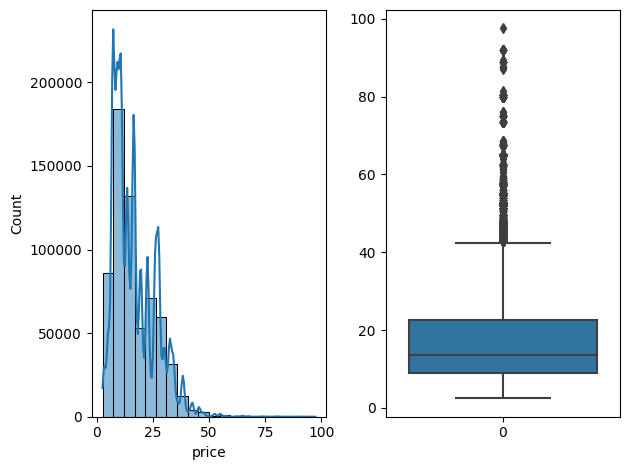

In [23]:

plt.subplot(1, 2, 1)
sns.histplot(trip_data['price'], bins=20, kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(trip_data['price'])

plt.tight_layout()
plt.show()

In [24]:
print('Skewness:',trip_data['price'].skew())

Skewness: 1.0457470560899256


Dari mean, median, modus, grafik, dan nilai skewness, variabel `price` tidak berdistribusi normal.

***distance***

In [25]:
trip_data['distance'].describe()

count    693071.000000
mean          2.189430
std           1.138937
min           0.020000
25%           1.280000
50%           2.160000
75%           2.920000
max           7.860000
Name: distance, dtype: float64

In [26]:
trip_data['distance'].value_counts()

distance
2.66    9174
2.32    9127
2.84    8562
1.41    7884
1.25    7434
        ... 
5.06       6
5.03       6
4.87       6
4.99       6
4.89       6
Name: count, Length: 549, dtype: int64

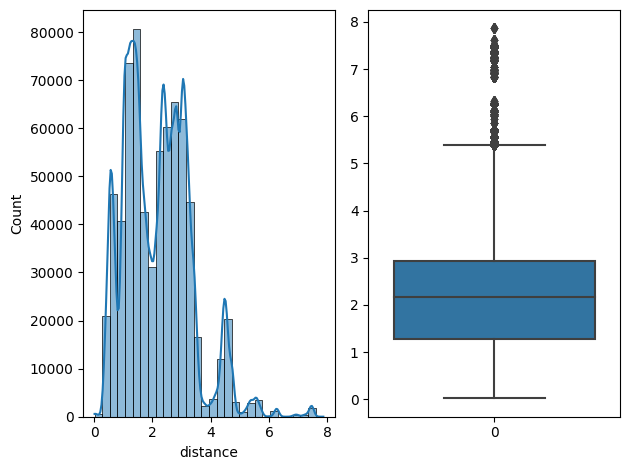

In [27]:
plt.subplot(1, 2, 1)
sns.histplot(trip_data['distance'], bins=30, kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(trip_data['distance'])

plt.tight_layout()
plt.show()

In [28]:
print('Skewness:',trip_data['distance'].skew())

Skewness: 0.8343950077972692


Dari mean, median, modus, grafik, dan nilai skewness, variabel `distance` tidak berdistribusi normal. Terlihat ada sejumlah outlier.

Melihat persebaran data antara *price* dan *distance* berdasarkan *ride_type* :

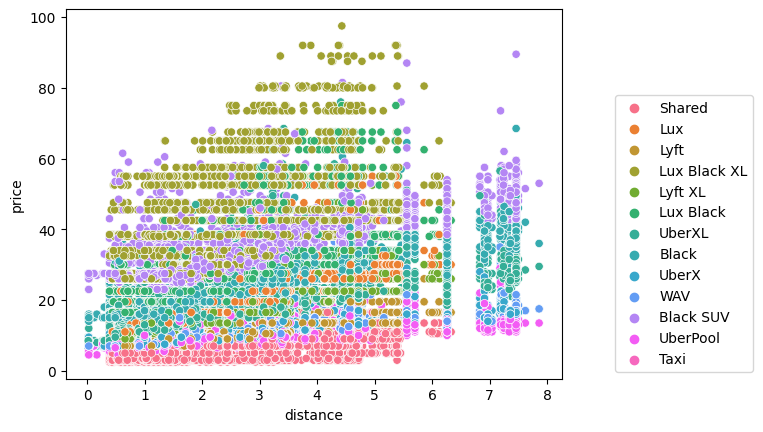

                       distance
cab_type ride_type             
Lyft     Lux              51235
         Lux Black        51235
         Lux Black XL     51235
         Lyft             51235
         Lyft XL          51235
         Shared           51233
Uber     Black            55095
         Black SUV        55096
         Taxi             55095
         UberPool         55091
         UberX            55094
         UberXL           55096
         WAV              55096


In [29]:
sns.scatterplot(x=trip_data['distance'], y=trip_data['price'], hue=trip_data['ride_type'])
plt.legend(bbox_to_anchor=(1.4, 0), loc='lower right')

plt.show()

print(trip_data.groupby(['cab_type', 'ride_type']).agg({'distance':'count'})) # digunakan count distance karena di kolom price, ride_type taxi berisi null

Untuk masing-masing *ride-type* :

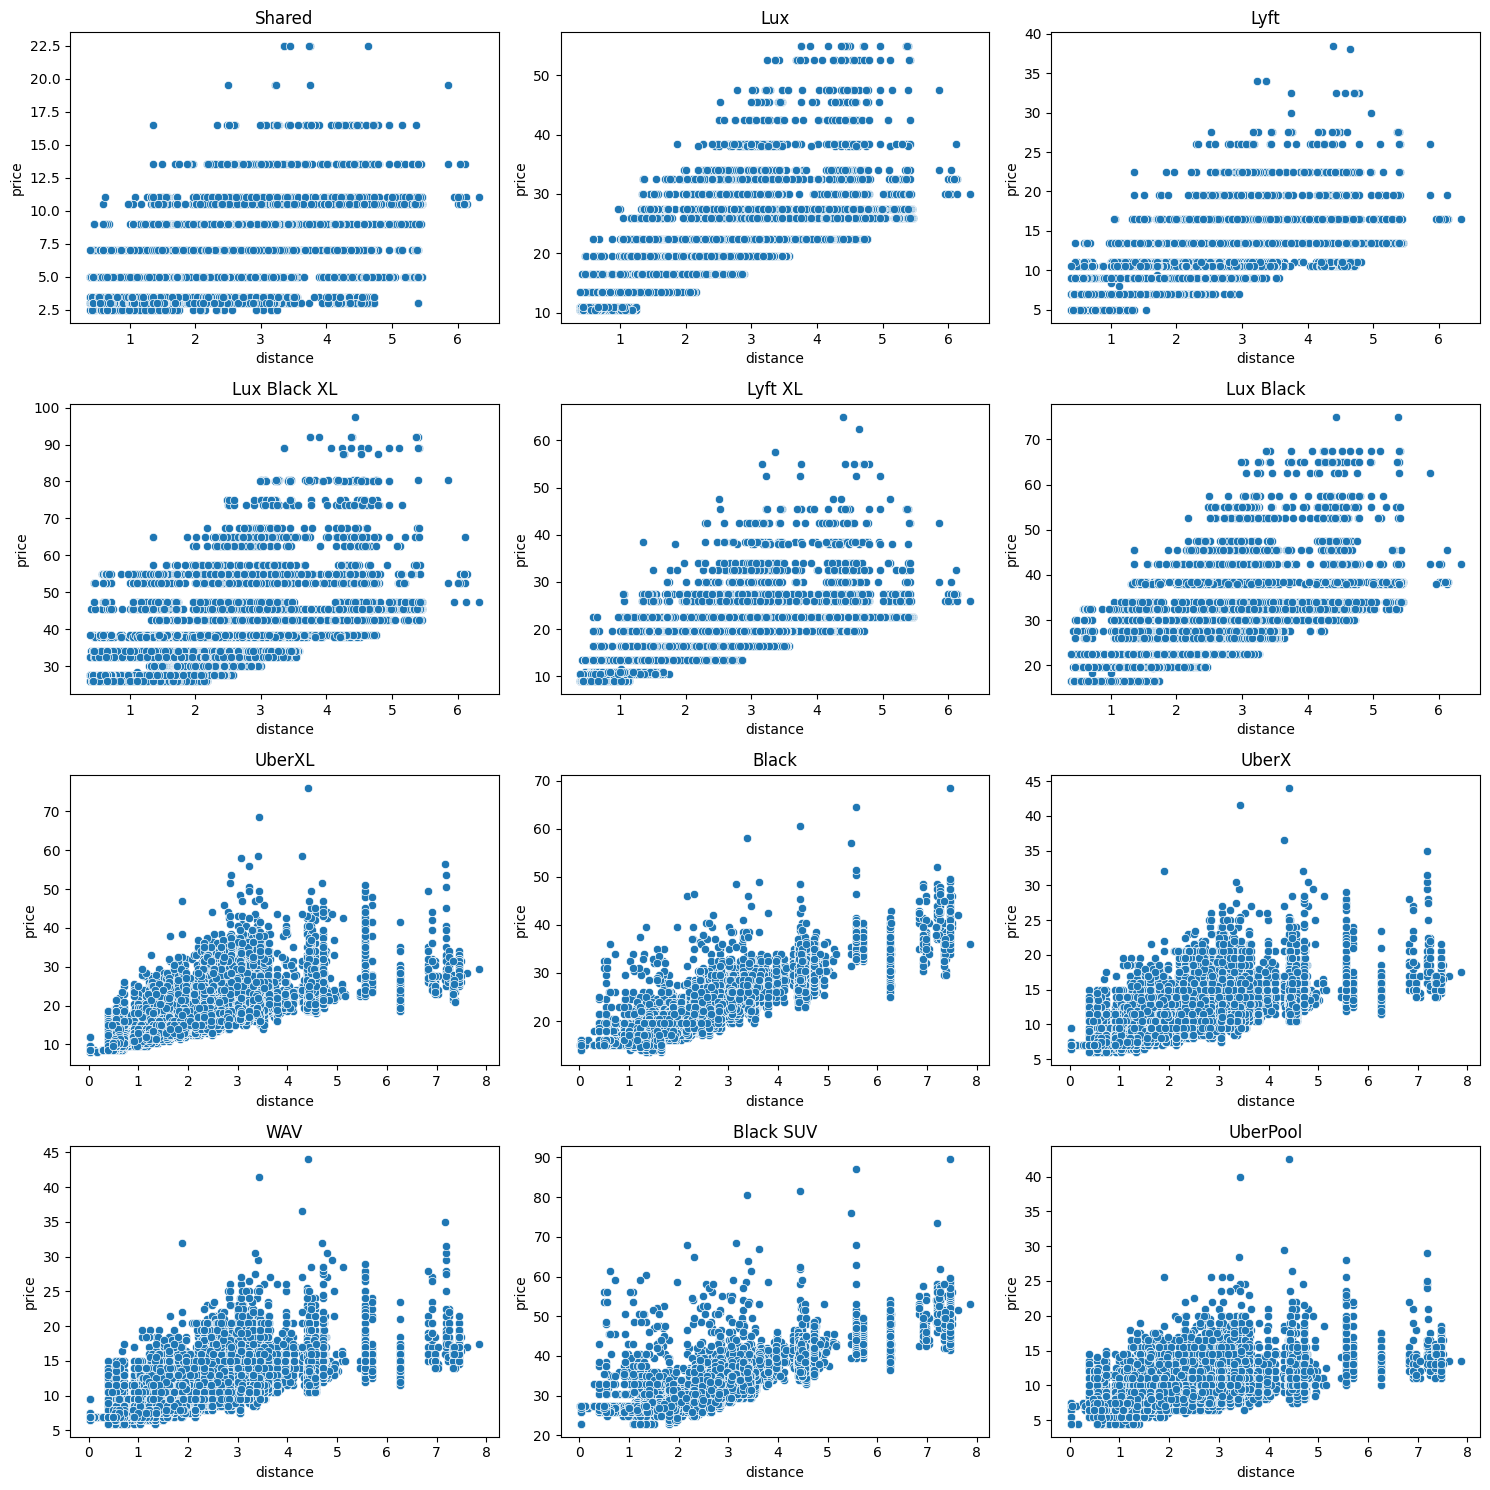

In [30]:
plt.figure(figsize=(15,15))

for i in range(len(trip_data['ride_type'].unique()) - 1):
    ridetype = trip_data['ride_type'].unique()[i]
    plt.subplot(4, 3, i+1).set_title(ridetype)
    sns.scatterplot(x=trip_data['distance'][trip_data['ride_type'] == ridetype], y=trip_data['price'][trip_data['ride_type'] == ridetype])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Taxi')

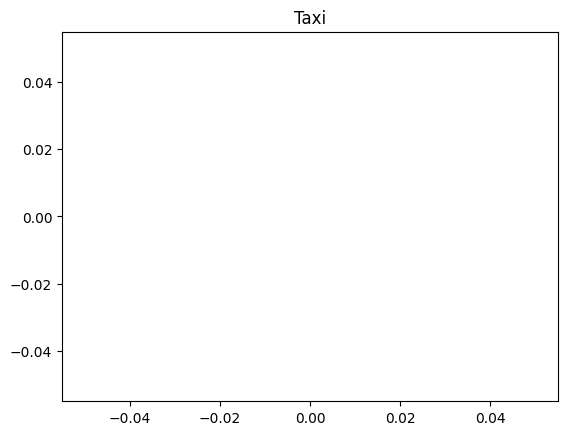

In [31]:
sns.scatterplot(x=trip_data['distance'][trip_data['ride_type'] == 'Taxi'], y=trip_data['price'][trip_data['ride_type'] == 'Taxi']).set_title('Taxi')

Kelihatannya setiap `ride_type` kecuali Taxi bisa memiliki regresi linear-nya masing-masing. Untuk Shared, agak diragukan apakah cocok dibuat regresi linear-nya. Antara *price* dan *distance* dari setiap `ride_type` kelihatannya berkorelasi positif.

---

# V. Feature Engineering

## Cek Duplicate

In [32]:
trip_data.duplicated().sum()

1493

Duplikasi data termasuk kolom *datetime* menunjukkan pemesanan di waktu yang sama dengan detail perjalanan yang sama. Hal ini sangat kecil kemungkinannya terjadi. Jadi akan di-drop.

Drop duplicated data :

In [33]:
trip_data.drop_duplicates(keep='first', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20424\1813349589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data.drop_duplicates(keep='first', inplace=True)


In [34]:
trip_data.duplicated().sum()

0

## Missing Value Handling

In [35]:
trip_data.isnull().sum()

datetime                0
pickup                  0
destination             0
cab_type                0
ride_type               0
price               54542
distance                0
surge_multiplier        0
dtype: int64

Karena `price` tidak berdistribusi normal, maka missing value-nya akan diisi dengan median.

In [36]:
trip_data.fillna({'price': trip_data['price'].median()}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20424\1940568233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data.fillna({'price': trip_data['price'].median()}, inplace=True)


In [37]:
trip_data

,datetime,pickup,destination,cab_type,ride_type,price,distance,surge_multiplier
0,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...
693066,2018-12-01 23:53:05,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,2018-12-01 23:53:05,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,2018-12-01 23:53:05,West End,North End,Uber,Taxi,13.5,1.00,1.0
693069,2018-12-01 23:53:05,West End,North End,Uber,Black SUV,27.0,1.00,1.0


## Feature Selection

### Analisis korelasi variabel numerik dengan variabel `price` :

Digunakan analisis korelasi Spearman karena data tidak berdistribusi normal.

In [38]:
trip_data[num_cols].corr(method='spearman')

,price,distance,surge_multiplier
price,1.000000,0.310749,0.163538
distance,0.310749,1.000000,0.031330
surge_multiplier,0.163538,0.031330,1.000000


Korelasi antara `price` dan `distance` bisa dikatakan lemah hingga tidak ada, tetapi seharusnya biaya perjalanan ditentukan oleh jarak yang ditempuh juga. Jadi `distance` **akan digunakan** sebagai feature.

Di sisi lain, `price` dan `surge_multiplier` menunjukkan korelasi yang hampir tidak ada. Tetapi `surge_multiplier` seharusnya berpengaruh dalam menentukan biaya perjalanan. Jadi, `surge_multiplier` **akan digunakan** sebagai feature.

--

### Analisis korelasi antara variabel `price` dengan variabel-variabel kategorik :

Akan digunakan oji *one-way* ANOVA untuk menentukan ada tidaknya korelasi antara variabel kategorik dan `price`.

$H_0$ : Tidak ada korelasi antara `price` dan variabel kategorik.

$H_1$ : Ada korelasi.

In [39]:
for i in cat_cols:
    grouped_values = []
    for j in trip_data[i].unique():
        grouped_values.append(trip_data['price'][trip_data[i] == j])
    print(f'{i} {stats.f_oneway(*grouped_values)}')

pickup F_onewayResult(statistic=1467.5746126680917, pvalue=0.0)
destination F_onewayResult(statistic=1322.6640304766893, pvalue=0.0)
cab_type F_onewayResult(statistic=7550.088864522433, pvalue=0.0)
ride_type F_onewayResult(statistic=199684.77293017835, pvalue=0.0)


Setiap variabel kategorik memberikan p-value \< 0.05. Jadi, semuanya berkorelasi dengan `price`.

Tetapi, lokasi penjemputan dan tujuan seharusnya tidak mempengaruhi harga perjalanan, jadi variabel `pickup` dan `destination` **tidak akan digunakan** sebagai feature.

Perusahaan mana yang menyediakan jasa juga seharusnya tidak berpengaruh dalam penentuan harga karena akan terepresentasi oleh `ride_type`, jadi variabel `cab_type` **tidak akan digunakan** sebagai feature.

Jenis kendaraan yang digunakan seharusnya berpengaruh. Jadi `ride_type` **akan digunakan** sebagai feature.

## Data Splitting

Karena ingin dicari regresi linear untuk memprediksi harga perjalanan, maka dipilih:

`price` sebagai `y`

`x` sebagai kolom `ride_type`, `distance`, dan `surge_multiplier`.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(trip_data[['ride_type','distance','surge_multiplier']], trip_data['price'],
                                                    test_size= 0.3, random_state=0)

print('x Train size:', x_train.shape)
print('x Test size:', x_test.shape)

print('y Train size:', x_train.shape)
print('y Test size:', x_test.shape)

x Train size: (484104, 3)
x Test size: (207474, 3)
y Train size: (484104, 3)
y Test size: (207474, 3)


### Outlier Handling

Tidak dilakukan handling terhadap outlier karena *arguably* data dalam dataset terjadi secara natural.

## Encoding

Setiap kolom kategorik berupa nominal, jadi akan digunakan OneHotEncoder untuk encoding-nya.

In [41]:
enc = OneHotEncoder(sparse_output=False)

# encoding
x_train_ohe = enc.fit_transform(x_train[['ride_type']])
x_test_ohe = enc.transform(x_test[['ride_type']])

x_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
feature_names = enc.get_feature_names_out(input_features= ['ride_type'])
# bikin ke dataframe hasil encodingnya dengan judul kolom 'feature_names'
x_train_ohe = pd.DataFrame(x_train_ohe, columns=feature_names)
x_test_ohe = pd.DataFrame(x_test_ohe, columns=feature_names)

x_train_ohe.head()

,ride_type_Black,ride_type_Black SUV,ride_type_Lux,ride_type_Lux Black,ride_type_Lux Black XL,ride_type_Lyft,ride_type_Lyft XL,ride_type_Shared,ride_type_Taxi,ride_type_UberPool,ride_type_UberX,ride_type_UberXL,ride_type_WAV
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
# reset index biar sama ukurannya seperti sebelum di-encoding
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [44]:
# gabungin dataframe yang sudah di-encoding ke dataframe sebelum di-encoding kemudian drop kolom yang di-encode
x_train_new = pd.concat([x_train, x_train_ohe], axis=1)
x_train_new.drop(columns='ride_type', inplace=True)

x_test_new = pd.concat([x_test, x_test_ohe], axis=1)
x_test_new.drop(columns='ride_type', inplace=True)

x_train_new.head()

,distance,surge_multiplier,ride_type_Black,ride_type_Black SUV,ride_type_Lux,ride_type_Lux Black,ride_type_Lux Black XL,ride_type_Lyft,ride_type_Lyft XL,ride_type_Shared,ride_type_Taxi,ride_type_UberPool,ride_type_UberX,ride_type_UberXL,ride_type_WAV
0,3.98,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4.48,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.23,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Scaling

Digunakan Robust Scaler karena feature yang numerik (`distance`) tidak berdistribusi normal dan terlihat banyak outlier. Variabel `surge_multiplier` tidak di-scale.

Karena feature yang di-scale hanya `distance`, maka akan di-reshape dulu :

In [45]:
x_train_scaled = x_train_new['distance'].to_numpy().reshape(-1, 1)
x_test_scaled = x_test_new['distance'].to_numpy().reshape(-1, 1)

In [46]:
# scaling
scaler = RobustScaler()
scaler.fit(x_train_scaled)

x_train_scaled = scaler.transform(x_train_scaled)
x_test_scaled = scaler.transform(x_test_scaled)

x_train_scaled

array([[ 1.1030303 ],
       [-0.27272727],
       [ 1.40606061],
       ...,
       [-0.26666667],
       [-0.76363636],
       [ 0.4969697 ]])

In [47]:
# reshape ulang biar bisa dibuat ke dataframe
x_train_scaled = pd.DataFrame({'distance' : x_train_scaled.reshape(1,-1)[0], 'surge_multiplier' : x_train_new['surge_multiplier']})
x_test_scaled = pd.DataFrame({'distance' : x_test_scaled.reshape(1,-1)[0], 'surge_multiplier' : x_test_new['surge_multiplier']})


In [48]:
# gabungin dataframe dengan hasil encoding
x_train_scaled = pd.concat([x_train_scaled, x_train_ohe], axis=1)
x_test_scaled = pd.concat([x_test_scaled, x_test_ohe], axis=1)

x_train_scaled

,distance,surge_multiplier,ride_type_Black,ride_type_Black SUV,ride_type_Lux,ride_type_Lux Black,ride_type_Lux Black XL,ride_type_Lyft,ride_type_Lyft XL,ride_type_Shared,ride_type_Taxi,ride_type_UberPool,ride_type_UberX,ride_type_UberXL,ride_type_WAV
0,1.103030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.272727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.406061,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.042424,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.551515,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484099,0.278788,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
484100,-0.606061,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484101,-0.266667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484102,-0.763636,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


---
# VI. Model Definition

Digunakan model regresi linear dari scikit-learn (Ordinary Least Square) untuk memprediksi harga perjalanan berdasarkan jarak perjalanan yang ditempuh tanpa memperhatikan jenis kendaraan yang dipesan.

Untuk metrics, akan digunakan adalah Mean Absolute Error (MAE) dan R2 Score karena cukup banyak titik data yang bisa dibilang outlier dan outlier tidak dihilangkan.

In [49]:
model_linreg = LinearRegression()

---

# VII. Model Training

In [50]:
model_linreg.fit(x_train_scaled, y_train)

print('intercept:', model_linreg.intercept_)
print('coef:', model_linreg.coef_)
pd.DataFrame(
    {
        'feature' : x_train_new.columns.tolist(),
        'coefficient' : model_linreg.coef_.tolist()
    }
)

intercept: -15409501378.936003
coef: [4.22128458e+00 1.83832011e+01 1.54095014e+10 1.54095014e+10
 1.54095014e+10 1.54095014e+10 1.54095014e+10 1.54095014e+10
 1.54095014e+10 1.54095014e+10 1.54095014e+10 1.54095014e+10
 1.54095014e+10 1.54095014e+10 1.54095014e+10]


,feature,coefficient
0,distance,4.221285e+00
1,surge_multiplier,1.838320e+01
2,ride_type_Black,1.540950e+10
3,ride_type_Black SUV,1.540950e+10
4,ride_type_Lux,1.540950e+10
5,ride_type_Lux Black,1.540950e+10
6,ride_type_Lux Black XL,1.540950e+10
7,ride_type_Lyft,1.540950e+10
8,ride_type_Lyft XL,1.540950e+10
9,ride_type_Shared,1.540950e+10



---

# VIII. Model Evaluation

Tarif awal setiap `ride_type` :

In [51]:
pd.DataFrame(
    {
        'ride_type' : x_train_new.columns.tolist()[2:],
        'base_price' :model_linreg.intercept_ + model_linreg.coef_.tolist()[2:]
    }
)    

,ride_type,base_price
0,ride_type_Black,2.049465
1,ride_type_Black SUV,11.839624
2,ride_type_Lux,-1.356424
3,ride_type_Lux Black,3.924772
4,ride_type_Lux Black XL,13.193932
5,ride_type_Lyft,-9.542032
6,ride_type_Lyft XL,-3.836395
7,ride_type_Shared,-12.431467
8,ride_type_Taxi,-4.966913
9,ride_type_UberPool,-9.723303


Model regresi linear memprediksi harga suatu perjalanan dengan cara berikut.
$$price = base\_price + distance \times 4.221285 + surge\_multiplier \times 1.838320$$
Rumus ini bukan rumus matematis yang asli dari model regresi linear yang telah dibuat. Hanya versi *simplified*. `base_price` di sini adalah harga tarif awal untuk setiap jenis kendaraan (`ride_type`), didapatkan dari (intercept + koefisien `ride_type` yang dipilih). `surge_multiplier` mungkin seharusnya dikalikan dengan harga `base_price` + (`distance` $\times$ koefisien `distance`), tetapi modelnya nanti tidak menjadi linear.

Bisa diperhatikan bahwa harga yang diprediksi model kemungkinan besar akan lebih mahal daripada data aslinya. 

### Model Prediction

In [52]:
y_pred_train = model_linreg.predict(x_train_scaled)
y_pred_test = model_linreg.predict(x_test_scaled)

In [53]:
print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test))
print('')

print('RMSE - Train Set  : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set   : ', mean_squared_error(y_test, y_pred_test, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

MAE - Train Set  :  1.8231664727678292
MAE - Test Set   :  1.8150980415231346

RMSE - Train Set  :  2.577567040284907
RMSE - Test Set   :  2.5586064642762256

R2 Score - Train Set :  0.9177840432697575
R2 Score - Test Set  :  0.9189192631302323


Hasil prediksi yang bisa dibilang memuaskan. MAE hanya kurang dari \$2, RMSE kurang dari \$3, dan kecocokan model dengan dataset hingga 91,7% meskipun dengan perbadingan 7:3 train-test. Tentu ada kemungkinan *overfit* karena pemilihan feature yang digunakan. Tetapi melihat nilai error yang relatif kecil membuat saya senang karena akurat.

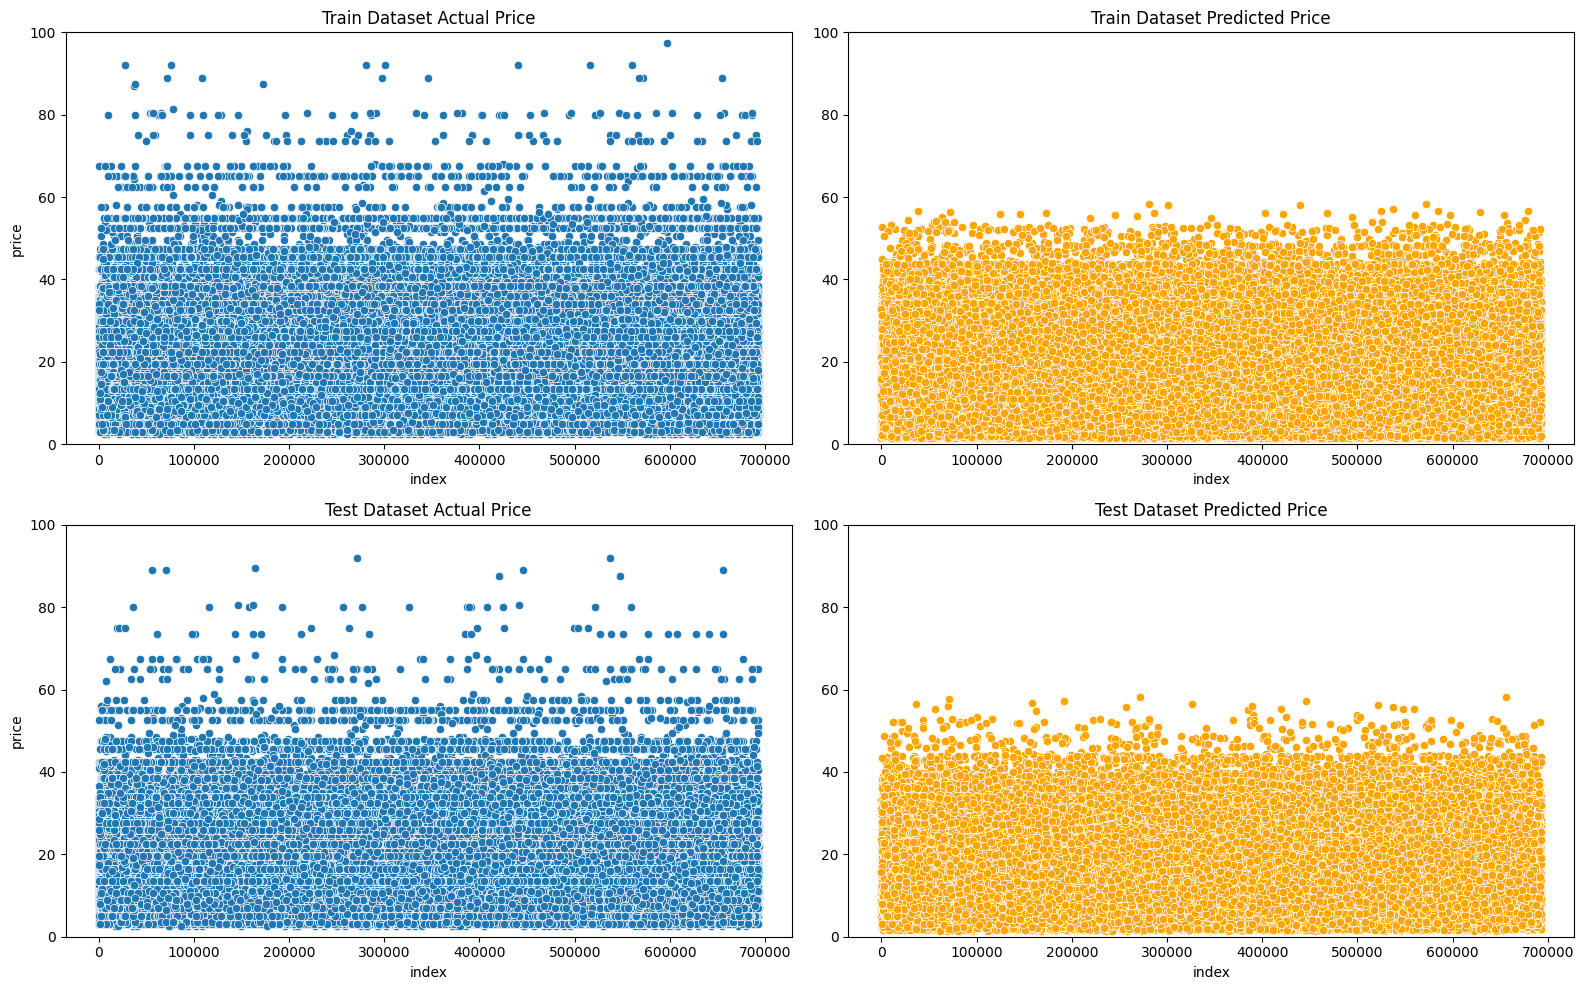

In [54]:
# plot hasil prediksi price dan aslinya terhadap distance
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_train.index, y=y_train)
plt.ylim(0, 100)
plt.xlabel('index')
plt.title('Train Dataset Actual Price')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_train.index, y=y_pred_train, color='orange')
plt.ylim(0, 100)
plt.xlabel('index')
plt.title('Train Dataset Predicted Price')

plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test.index, y=y_test)
plt.ylim(0, 100)
plt.xlabel('index')
plt.title('Test Dataset Actual Price')

plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test.index, y=y_pred_test,  color='orange')
plt.ylim(0, 100)
plt.xlabel('index')
plt.title('Test Dataset Predicted Price')

plt.tight_layout()
plt.show()

In [55]:
cekoutlier_train = pd.DataFrame({
    'actual' : y_train,
    'predicted' : y_pred_train,
})

cekoutlier_train[cekoutlier_train['actual'] >= 60]

,actual,predicted
581122,65.0,47.692636
157759,65.0,47.419645
420630,80.0,51.223166
467774,80.5,56.100384
195267,65.0,39.318901
...,...,...
304641,67.5,52.748940
422154,65.0,46.549807
193779,65.0,50.599922
547122,65.0,50.318502


In [56]:
cekoutlier_test = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred_test
})

cekoutlier_test[cekoutlier_test['actual'] >= 60]

,actual,predicted
326049,80.0,56.586472
573133,65.0,51.674431
226525,62.5,45.834274
541693,62.5,51.674431
164401,89.5,43.782104
...,...,...
109747,67.5,51.904682
397060,75.0,50.609159
597788,73.5,52.544271
214390,65.0,48.929884


In [57]:
pd.DataFrame({
    'actual' : y_train,
    'predicted' : y_pred_train,
})

,actual,predicted
635257,42.5,36.233337
401673,7.0,4.800474
453828,42.0,36.158209
542995,22.5,22.487059
224915,10.0,10.988001
...,...,...
360214,7.0,7.128576
152396,27.5,27.664473
117996,9.0,7.715492
436478,6.5,5.436373


In [58]:
pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred_test,
})

,actual,predicted
352448,10.5,12.837498
389248,9.0,8.381552
269839,5.0,2.216537
173317,9.0,10.402271
237561,7.0,6.820068
...,...,...
14198,16.0,19.025572
466132,19.5,21.207882
96196,27.5,26.103876
650081,9.5,12.398169


Titik-titik biru adalah nilai Actual `price` dan titik-titik jingga adalah Predicted `price`. Hasil prediksi model regresi linear terlihat tidak melebihi \$60. Harga-harga yang berada di atas \$60 tidak terprediksi secara akurat. Model memprediksi harga-harga asli yang berada di atas \$60 menjadi di bawah \$60. Berdasarkan model, mungkin bisa dikatakan perjalanan dengan harga di atas \$60 itu *overcharged* dan tidak lazim.

Selain itu, model relatif cukup akurat memprediksi harga-harga perjalanan yang berada di bawah sekitar \$45.

---

# IX. Model Saving

In [59]:
# model dan feature engineering
with open('model_linreg.pkl', 'wb') as file_1:
    joblib.dump(model_linreg, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
    joblib.dump(scaler, file_2)

with open('model_encoder.pkl', 'wb') as file_3:
    joblib.dump(enc, file_3)

In [60]:
# feature selection
with open('list_num_features.txt', 'w') as file_4:
    json.dump(['distance'], file_4)

with open('list_cat_cols_ohe.txt', 'w') as file_5:
    json.dump(['ride_type'], file_5)

---

# X. Model Inference

File loading :

In [61]:
with open('model_linreg.pkl', 'rb') as file_1:
    model_infer_linreg = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
    model_infer_scaler = joblib.load(file_2)

with open('model_encoder.pkl', 'rb') as file_3:
    model_infer_encoder = joblib.load(file_3)

with open('list_num_features.txt', 'r') as file_4:
    num_feature_infer = json.load(file_4)

with open('list_cat_cols_ohe.txt', 'r') as file_5:
    cat_cols_ohe_infer = json.load(file_5)

Data to infer :

In [62]:
data_infer = pd.DataFrame(
    {
        'ride_type':['WAV', 'Taxi', 'Lux Black XL', 'Lyft', 'Black'],
        'distance':[2.1, 3.6, 5.1, 2.4, 4.1],
        'surge_multiplier':[1, 1, 2.5, 1, 2]
    }
)

Encoding

In [63]:
data_infer_ohe = model_infer_encoder.transform(data_infer[cat_cols_ohe_infer])

feature_names = model_infer_encoder.get_feature_names_out(input_features= cat_cols_ohe_infer)
data_infer_ohe = pd.DataFrame(data_infer_ohe, columns=feature_names)

data_infer_new = pd.concat([data_infer, data_infer_ohe], axis=1)
data_infer_new.drop(columns=cat_cols_ohe_infer, inplace=True)

Scaling

In [64]:
data_infer_new[num_feature_infer] = model_infer_scaler.transform(data_infer_new[num_feature_infer])

c:\Users\USER\miniconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Predicting

In [65]:
data_infer['price'] = model_infer_linreg.predict(data_infer_new)
data_infer

,ride_type,distance,surge_multiplier,price
0,WAV,2.1,1.0,9.537220
1,Taxi,3.6,1.0,17.100319
2,Lux Black XL,5.1,2.5,66.673496
3,Lyft,2.4,1.0,9.455173
4,Black,4.1,2.0,43.779076


---

# XI. Conclusion

Model regresi linear untuk memprediksi harga suatu perjalanan tanpa memperhitungkan cuaca yang telah dibuat memberikan hasil prediksi yang saya rasa cukup akurat terhadap dataset training dan testing. Meskipun hasil evaluasi model kemungkinan mengindikasikan *overfit* akibat feature yang dipilih. Berdasarkan data training dan testing, model tidak memprediksi harga hingga di atas \$60. Tetapi ketika model inference, prediksi di atas \$60 bisa diperoleh.

Model ini hanya memprediksi harga berdasarkan jenis kendaraan yang dipesan, jarak yang akan ditempuh, dan dalam keadaan *surge* yang separah apa. Tidak memperhitungkan faktor lain. Jadi tidak cocok jika Anda juga mempertimbangkan faktor cuaca.

---

# XII. Conceptual Problems

## 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression!

- Faktor cuaca tidak diikutsertakan dalam pemodelan regresi linear karena perlu diprediksi dulu apakah pada saat pemesanan sedang hujan atau tidak. Sedangkan hal yang akan dinilai hanya mengenai Linear Regression saja, tidak Logistic Regression.

- Feature yang digunakan berdasarkan korelasi antara variabel `price` dengan variabel-variabel yang lain, ditambah dengan *domain knowledge* yang saya ketahui secara umum.

## 2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun!

In [66]:
model_linreg.fit(x_train_scaled, y_train)

print('intercept:', model_linreg.intercept_)
print('coef:', model_linreg.coef_)
pd.DataFrame(
    {
        'feature' : x_train_new.columns.tolist(),
        'coefficient' : model_linreg.coef_.tolist()
    }
)

intercept: -15409501378.936003
coef: [4.22128458e+00 1.83832011e+01 1.54095014e+10 1.54095014e+10
 1.54095014e+10 1.54095014e+10 1.54095014e+10 1.54095014e+10
 1.54095014e+10 1.54095014e+10 1.54095014e+10 1.54095014e+10
 1.54095014e+10 1.54095014e+10 1.54095014e+10]


,feature,coefficient
0,distance,4.221285e+00
1,surge_multiplier,1.838320e+01
2,ride_type_Black,1.540950e+10
3,ride_type_Black SUV,1.540950e+10
4,ride_type_Lux,1.540950e+10
5,ride_type_Lux Black,1.540950e+10
6,ride_type_Lux Black XL,1.540950e+10
7,ride_type_Lyft,1.540950e+10
8,ride_type_Lyft XL,1.540950e+10
9,ride_type_Shared,1.540950e+10


*Intercept* dari model menunjukkan awal nilai harga akan diprediksi. Ya, nilai *intercept* yang diberikan model saya sangat negatif besar. Tetapi dibalas oleh *slope* dari setiap jenis kendaraan. Kemudian prediksi harga ditambah lagi dari *slope* jarak perjalanan dan apakah sedang banyak orang yang memesan perjalanan.

Tarif awal setiap `ride_type` :

In [67]:
pd.DataFrame(
    {
        'ride_type' : x_train_new.columns.tolist()[2:],
        'base_price' :model_linreg.intercept_ + model_linreg.coef_.tolist()[2:]
    }
)    

,ride_type,base_price
0,ride_type_Black,2.049465
1,ride_type_Black SUV,11.839624
2,ride_type_Lux,-1.356424
3,ride_type_Lux Black,3.924772
4,ride_type_Lux Black XL,13.193932
5,ride_type_Lyft,-9.542032
6,ride_type_Lyft XL,-3.836395
7,ride_type_Shared,-12.431467
8,ride_type_Taxi,-4.966913
9,ride_type_UberPool,-9.723303


Model regresi linear memprediksi harga suatu perjalanan dengan cara berikut.
$$price = base\_price + distance \times 4.221285 + surge\_multiplier \times 18.38320$$
Rumus ini bukan rumus matematis yang asli dari model regresi linear yang telah dibuat. Hanya versi *simplified*. `base_price` di sini adalah harga tarif awal untuk setiap jenis kendaraan (`ride_type`), didapatkan dari (intercept + koefisien `ride_type` yang dipilih). `surge_multiplier` mungkin seharusnya dikalikan dengan harga `base_price` + (`distance` $\times$ koefisien `distance`), tetapi modelnya nanti tidak menjadi linear. 